### Linear Regression using OLS (MLE)

- Assume:
    - $X$ and $Y$ are jointly normal distributed.
    - $\phi$ is the identity $\phi(X) = X$ (Linear Regression)
    - $Y$ is linear in $X$ (or linear in basis functions of $X$).
    - $Y$ = $WX$ + $\epsilon$, where $\epsilon$ ~ $N(0, B)$
    
$$W^{*} = (X^TX)^{-1}X^TY \;\;\;(Normal Equation)$$
$$1/B = \frac{1}{N}(W^TX - Y)^2$$

- OLS is usefull if:
    - The number of features is small.
    - The number of training examples is small (i.e. around 20,000).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def simulator(N, P, noise=True, noise_std=None):
    X = np.random.randn(N, P)
    
    # let W a random from [0, 7] and b=1
    w = np.random.randint(1, 5, size=P)
    b = np.repeat(1, N)
    
    print(w)
    # Y = xw + B + noise
    y = np.matmul(X, w) + b 
    
    if noise:
        noise_ = np.random.normal(0.0, noise_std, size=N)
        y += noise_
    y = y.reshape(N, 1)
    
    # concate X & Y to get the data
    X, y = np.array(X), np.array(y)
    data = np.concatenate((X, y), axis=1)
    assert data.shape == (N, P+1)
    return data

In [4]:
data = simulator(100, 2, True, 0.003)
X, Y = data[:, :2], data[:, -1]

data = simulator(100, 2, False, 0.003)
X_test, Y_test = data[:, :2], data[:, -1]

[1 2]
[2 3]


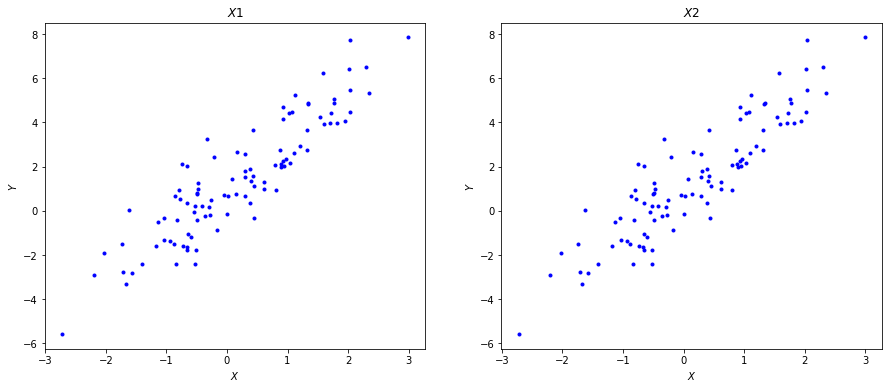

In [5]:
_, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].plot(X[:, 1], Y, 'b.'); axes[0].set_xlabel('$X$'); axes[0].set_ylabel('$Y$'); axes[0].set_title('$X 1$')
axes[1].plot(X[:, 1], Y, 'b.'); axes[1].set_title('$X 2$'); axes[1].set_xlabel('$X$'); axes[1].set_ylabel('$Y$');

### Feature scaling is usefull for:
- Data visualization
- Computations, where matrix with large-valued columns and very small-valued columns will lookm almost singular.

In [7]:
class OLS:
    def __init__(self):
        pass
    
    def fit(self, X, y):
        N = X.shape[0]
        # add cloumn of ones in X for the bias term
        X = np.append(X, np.ones((N, 1)), axis=1)        
        y = y.reshape(N, 1)
        # The Normal Equation W(ML) = (X^T X)^-1 X^T Y
        self.W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.B_inv = np.mean(np.square(X.dot(self.W) - y))

    def predict(self, X, std=False):
        X = np.append(X, np.ones((X.shape[0],1)), axis=1)
        preds = np.dot(X, self.W)
        if std:
            std_ = np.sqrt(self.B_inv) + np.zeros_like(preds)
            return y, std_
        return preds

In [8]:
ols_model = OLS()
ols_model.fit(X, Y)

In [9]:
# get the estimated coefficient
theta = ols_model.W
std = np.sqrt(ols_model.B_inv)

In [10]:
# the true std is 0.003
std

0.0030190749781026475

In [11]:
x_ = np.linspace(-3, 3, 10)
y_1 = theta[0] * x_ + theta[-1]
y_2 = theta[1] * x_ + theta[-1]

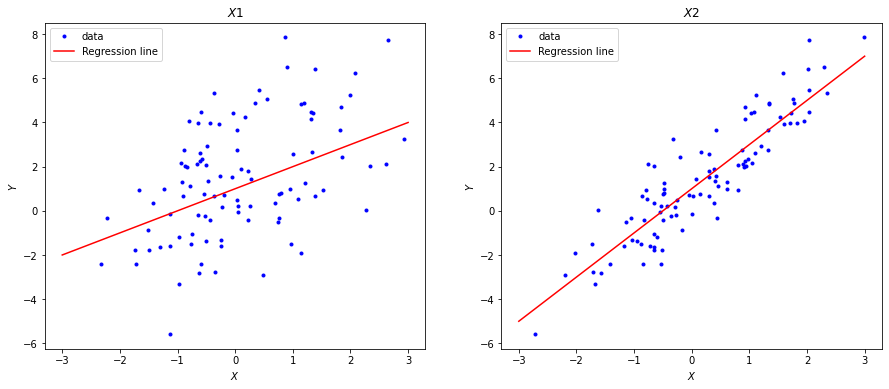

In [12]:
# Plot the regression line
_, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].plot(X[:, 0], Y, 'b.', label='data'); 
axes[0].set_xlabel('$X$')
axes[0].set_ylabel('$Y$')
axes[0].set_title('$X 1$')
axes[0].plot(x_, y_1, 'r', label='Regression line')
axes[0].legend()

axes[1].plot(X[:, 1], Y, 'b.', label='data')
axes[1].set_title('$X 2$')
axes[1].set_xlabel('$X$')
axes[1].set_ylabel('$Y$')
axes[1].plot(x_, y_2, 'r', label='Regression line')
axes[1].legend();

In [13]:
def plot_regression_line(X, Y, ax, v=[30, 0]):
    
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True

    x = np.linspace(-3, 3, 10)
    y = np.linspace(-3, 3, 10)

    x, y = np.meshgrid(x, y)
    eq = theta[0] * x + theta[1] * y + theta[-1]

    ax.plot_surface(x, y, eq, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], Y, color='b')
    ax.view_init(v[0], v[1])
    ax.set_zlim(-5, 7)

    return ax

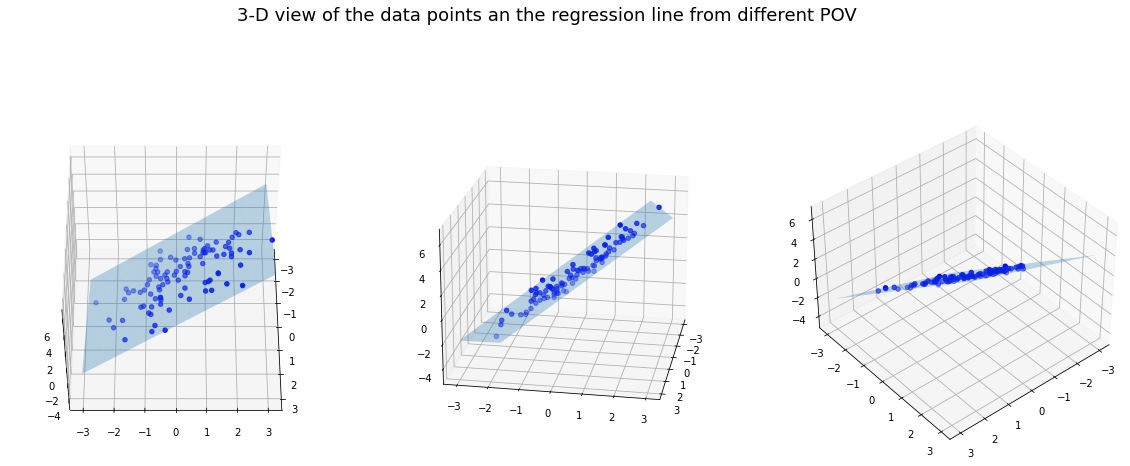

In [14]:
fig = plt.figure(figsize=(20, 8))
plt.suptitle('3-D view of the data points an the regression line from different POV', fontsize=18)
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
plot_regression_line(X, Y, ax1, [50, 0])
plot_regression_line(X, Y, ax2, [20, 10])
plot_regression_line(X, Y, ax3, [40, 50]);